# Seaborn Introduction

Although `matplotlib` is a capable and exhaustive library for data visualization, most of the time what we actually want is simple commands with sensible defaults. 

`Seaborn` does exactly that. 

It has fewer options (which can be limiting when creating complex diagrams), but its commands are far simpler. So most of the time people stick with Seaborn and only when we need something unique, we turn to matplotlib.

**NOTE**: seaborn uses matplotlib in the background, and so we can manipulate the seaborn diagrams using matplotlib commands

## Importing Data

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

import pathlib
data_path = pathlib.Path.cwd().parent / 'DATA'

In [54]:
df = pd.read_csv(str(data_path / 'dm_office_sales.csv'))

In [55]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


<br>

## Scatterplot

Let's first make a simple scatterplot with salary as the x-axis and sales as the y-axis. 

In a good organization their relationship should be increasing (mostly linear)

<AxesSubplot:xlabel='salary', ylabel='sales'>

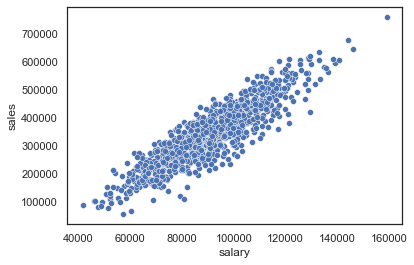

In [57]:
sns.scatterplot(x='salary', y='sales', data=df)

Notice that the relationship indeed looks to be linear (with some variation).

<br>

### Matplotlib Crashes the Party

Now let's manipulate this figure using matplotlib, by explicitly importing `matplotlib.pyplot`

**Notice** that so far we hadn't explicitly called matplotlib, seaborn implicitly uses matplotlib but does not provide direct access to it. (Much like keras and tensflow)

In [58]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='salary', ylabel='sales'>

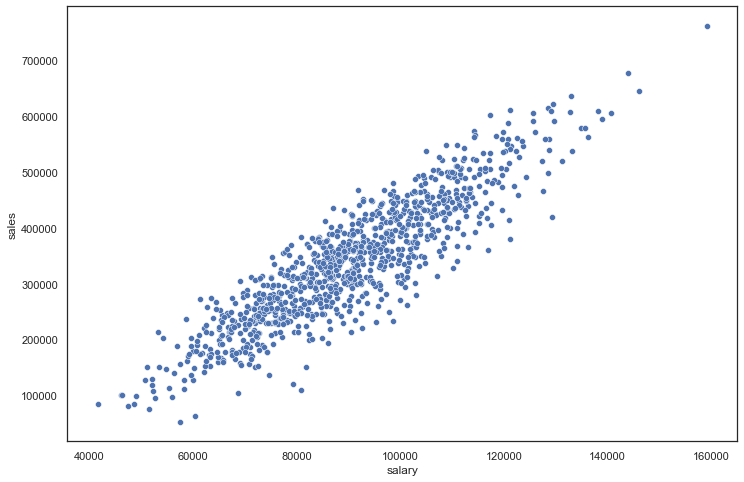

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df)

### Seaborn Parameters

#### Hue Parameter

- The data points **change their color based on the value** of the hue parameter. 
- It needs to be a **categorical variable**

##### Example 1

<AxesSubplot:xlabel='salary', ylabel='sales'>

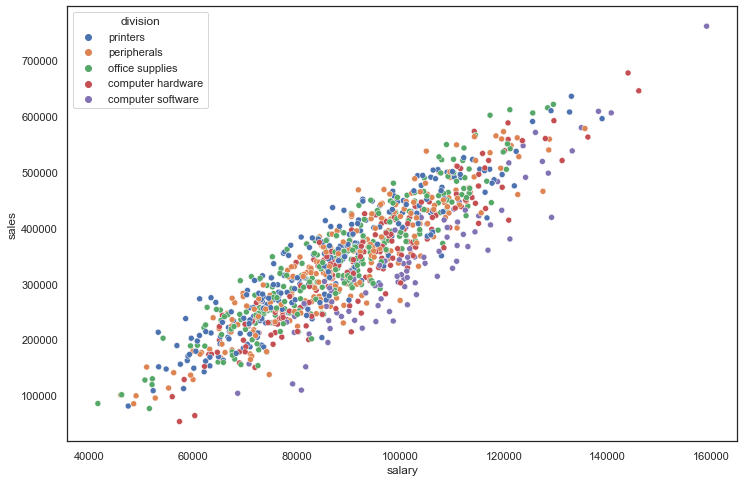

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, hue='division')

here hue takes the `division` column, which takes only 5 possible values (hence categorical variable)

##### Example 2

<AxesSubplot:xlabel='salary', ylabel='sales'>

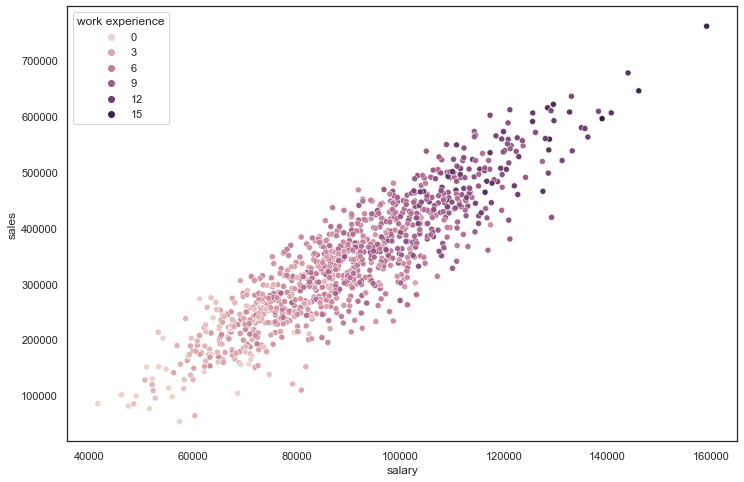

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, hue='work experience')

#### Palatte Parameter

Palatte changes the hue color

Choose a palette from Matplotlib's cmap: <https://matplotlib.org/stable/tutorials/colors/colormaps.html>

<AxesSubplot:xlabel='salary', ylabel='sales'>

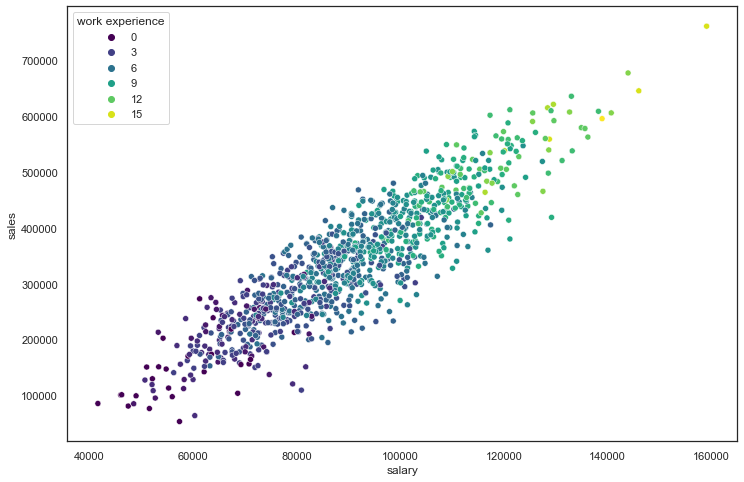

In [62]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, hue='work experience', palette='viridis')

### Scatterplot Parameters

The following parameters are specific to the scatterplots in seaborn.

#### `size`

- Allows you to change the **marker size** based on another column.

<AxesSubplot:xlabel='salary', ylabel='sales'>

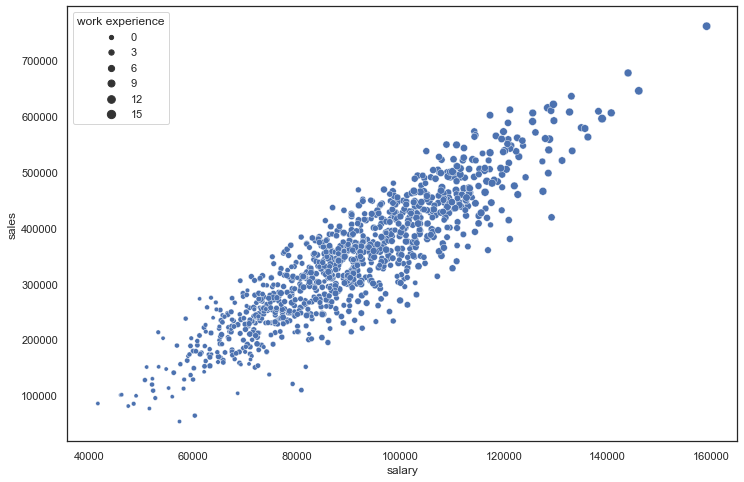

In [63]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, size='work experience')

- It also allows you to change the size of all markers to another value (usually larger).

<AxesSubplot:xlabel='salary', ylabel='sales'>

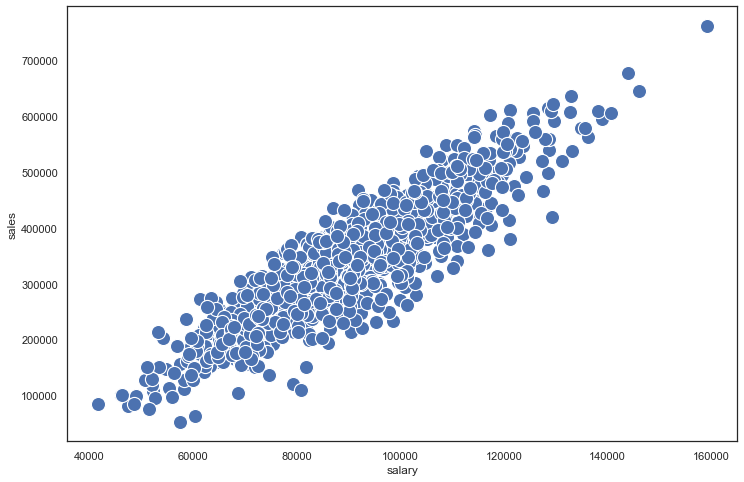

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, s=200)

- This is often used in conjuction with `alpha` to get a nice visualiztion of the distribution of the data.

<AxesSubplot:xlabel='salary', ylabel='sales'>

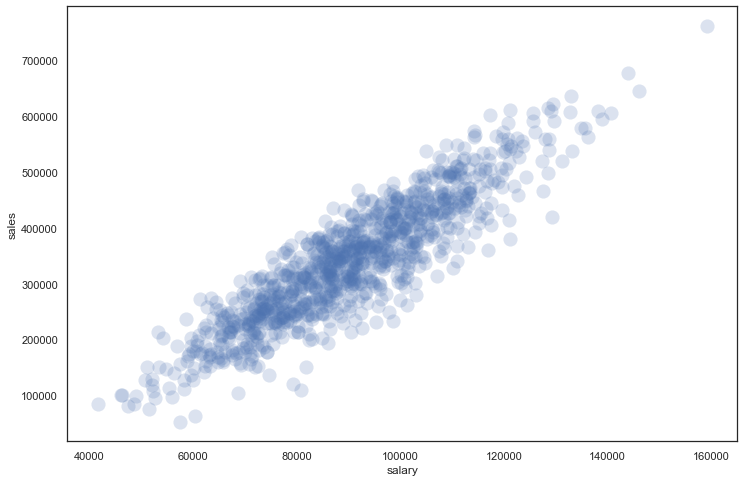

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, s=200, linewidth=0, alpha=0.2)

- Here the denser region represents more points overlapping

#### `style`



- Used to change the style of marker based on another data column

<AxesSubplot:xlabel='salary', ylabel='sales'>

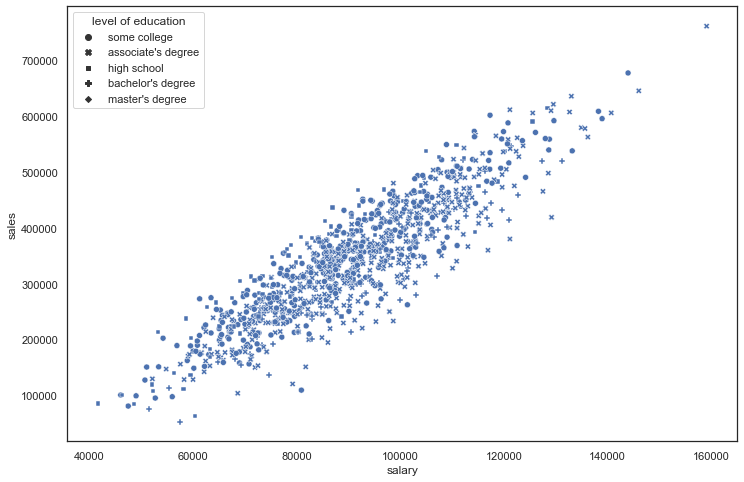

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, style='level of education')

### Combining Parameters

We can combine mutiple parameters to create a more pleasing figure

- Combining `hue` and `style` for the same parameter are very common

<AxesSubplot:xlabel='salary', ylabel='sales'>

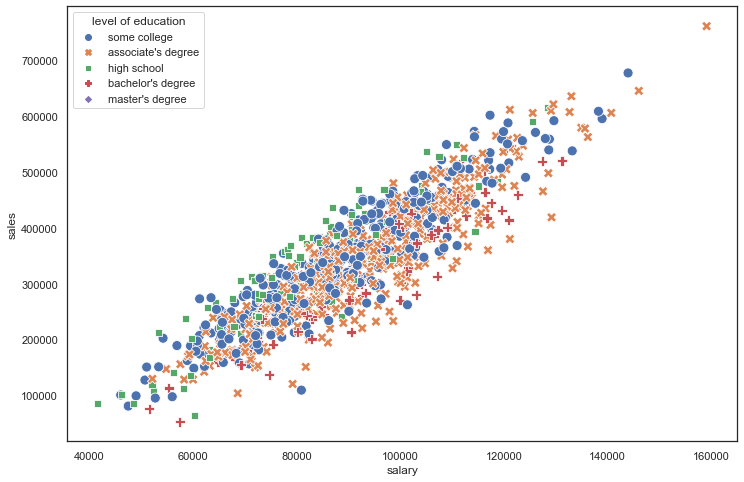

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='salary', y='sales', data=df, style='level of education', hue='level of education', s=100)

## Distributions

There are three major plot types to display a distribution:
1. rugplot
2. histplot
3. kdeplot
4. displot

Let's look at them one by one.

### `rugplot`

<AxesSubplot:xlabel='salary'>

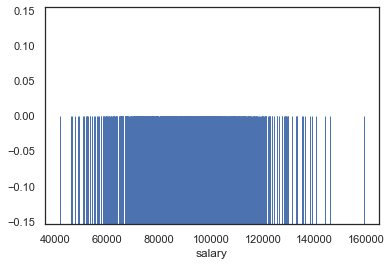

In [68]:
sns.rugplot(x='salary',data=df,height=0.5)

I really don't like this one; avoid using it

### `histplot`

Creates a histogram

<AxesSubplot:xlabel='salary', ylabel='Count'>

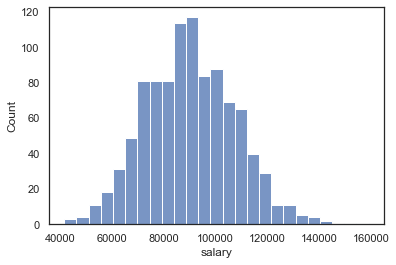

In [69]:
sns.histplot(data=df, x='salary')

Following are some useful parameters for `histplot`

#### `bins`

<AxesSubplot:xlabel='salary', ylabel='Count'>

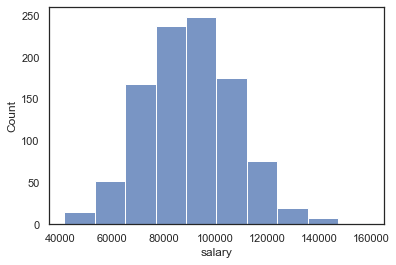

In [70]:
sns.histplot(data=df, x='salary', bins=10)

<AxesSubplot:xlabel='salary', ylabel='Count'>

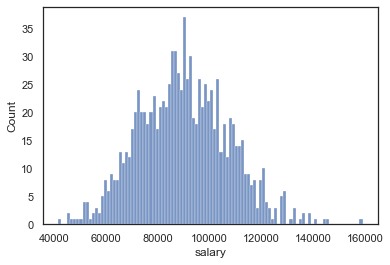

In [71]:
sns.histplot(data=df, x='salary', bins=100)

- Unless you are looking for something specific, the default choice is a good one.

#### `style` and grid

<AxesSubplot:xlabel='salary', ylabel='Count'>

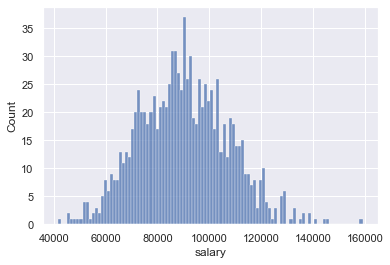

In [72]:
sns.set(style='darkgrid')
sns.histplot(data=df, x='salary', bins=100)

`sns.set` sets the style for the rest of the document. To unset it we set the style back to default

In [73]:
sns.set(style='white')

#### `matplotlib` arguments

We can still provide some matplotlib arguments like the following:

<AxesSubplot:xlabel='salary', ylabel='Count'>

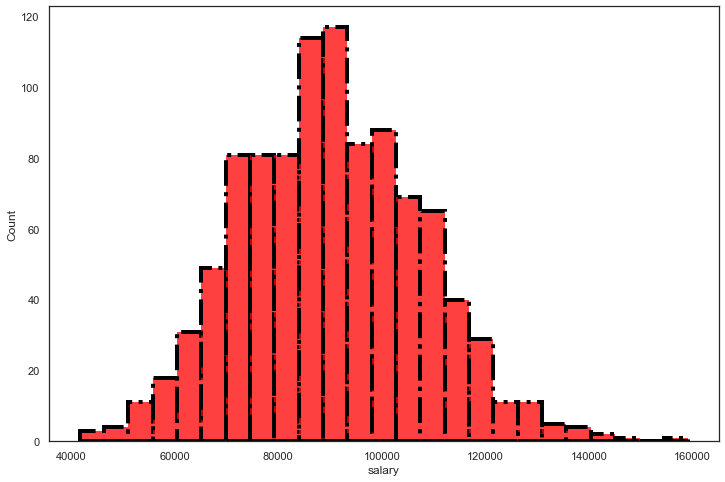

In [90]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='salary', color='red', edgecolor='black', lw=4, ls='-.')

***

### `kdeplot`

Kernal Density Estimation plot estimates the [<u id="pdf-back">PDF</u>](#pdf "Probability Density Function") corresponding to our random variable $x$.

[<u id="pdf">PDF</u>](#pdf-back): Probability Density Function

<AxesSubplot:xlabel='salary', ylabel='Density'>

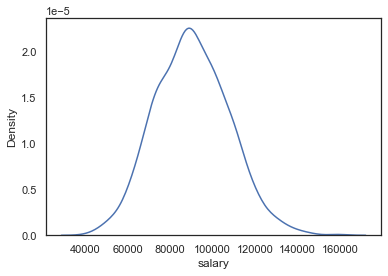

In [75]:
sns.kdeplot(data=df, x='salary')

***

Let's create a new dataset to learn more about `kdeplot`

In [76]:
np.random.seed(42)

# randint should be uniform, each age has the same chance of being chosen
# note: in reality ages are almost never uniformally distributed, but this is just an example
sample_ages = np.random.randint(0,100,200)
sample_ages = pd.DataFrame(sample_ages,columns=["age"])

Now let's quickly visulize this dataframe using `displot`

<AxesSubplot:xlabel='age', ylabel='Count'>

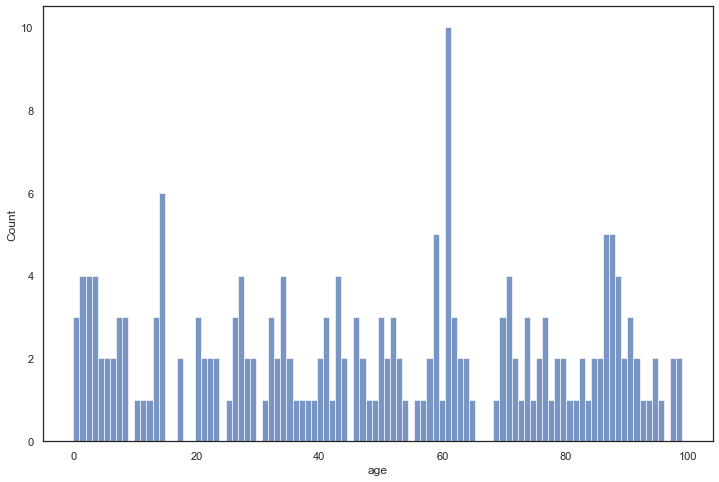

In [88]:
plt.figure(figsize=(12,8))
sns.histplot(data=sample_ages, x='age', bins=100)

<AxesSubplot:xlabel='age', ylabel='Count'>

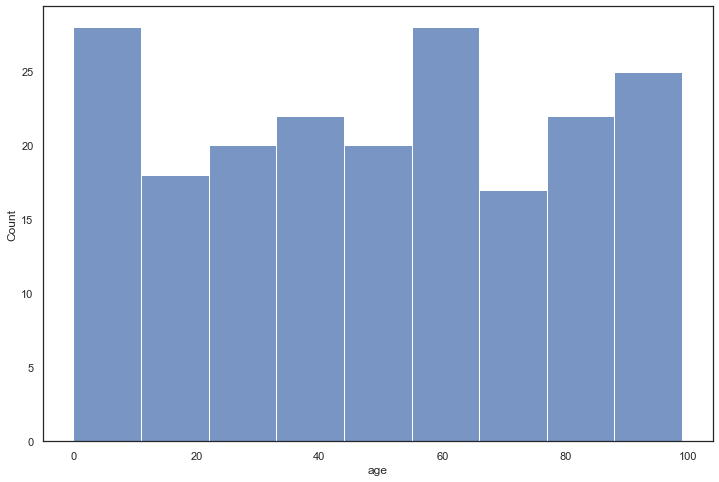

In [89]:
plt.figure(figsize=(12,8))
sns.histplot(data=sample_ages, x='age')

Now let's make the `kdeplot`

<AxesSubplot:xlabel='age', ylabel='Density'>

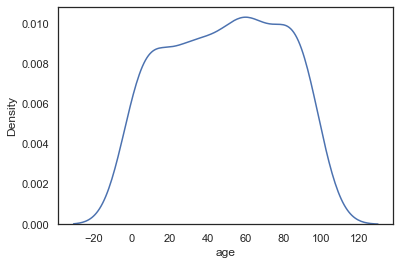

In [79]:
sns.kdeplot(data=sample_ages, x='age')

#### `clip`

By default a [<u id="pdf-back">PDF</u>](#pdf "Probability Density Function") is a function on $(-\infty, \infty)$. As can be seen by the PDF above having a non-zero value for $x=-20$.

If you know that your variable has a fixed [range](https://en.wikipedia.org/wiki/Range_of_a_function), then you can pass off that information to the `kdeplot` funtion.

In our case we will specify that the age is between 0 and 100

<AxesSubplot:xlabel='age', ylabel='Density'>

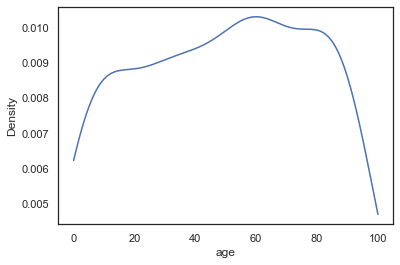

In [82]:
sns.kdeplot(data=sample_ages, x='age', clip=[0,100])

#### `bw_adjust`/ Bandwidth

This parameter is used to make the `kdeuntion` more or less sensitive to the data.

- On the back end matplotlib constructs the `kdeplot` by superimposing Gaussians for each datapoint. Bandwidth changes the variance of these gaussians.
- This is analogous to changing the bins in a histogram

<AxesSubplot:xlabel='age', ylabel='Density'>

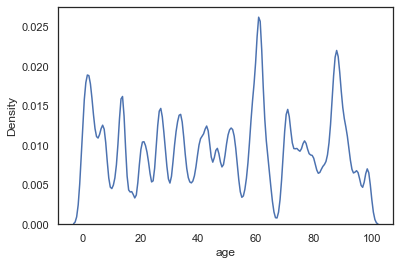

In [83]:
sns.kdeplot(data=sample_ages, x='age', bw_adjust=0.1)

<AxesSubplot:xlabel='age', ylabel='Density'>

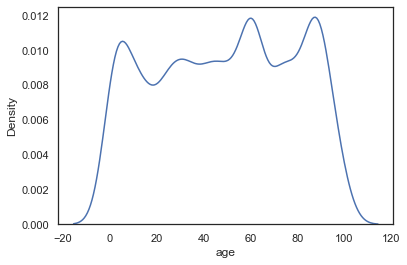

In [84]:
sns.kdeplot(data=sample_ages, x='age', bw_adjust=0.5)

<AxesSubplot:xlabel='age', ylabel='Density'>

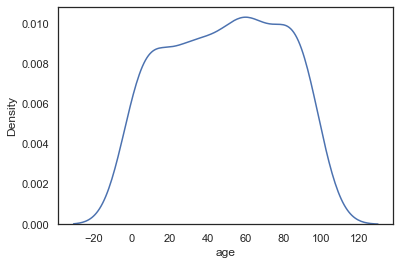

In [85]:
sns.kdeplot(data=sample_ages, x='age', bw_adjust=1)

#### `shade` and other styling

<AxesSubplot:xlabel='age', ylabel='Density'>

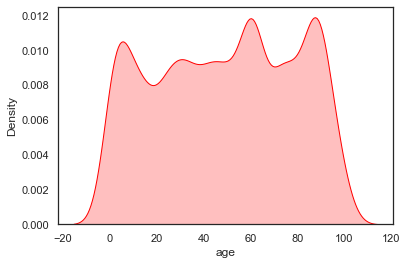

In [91]:
sns.kdeplot(data=sample_ages, x='age', bw_adjust=0.5, shade=True, color='red')

### `displot`

Allows you to combine other distribution plot types in one plot.

By default only shows the `histplot`

<Figure size 864x576 with 0 Axes>

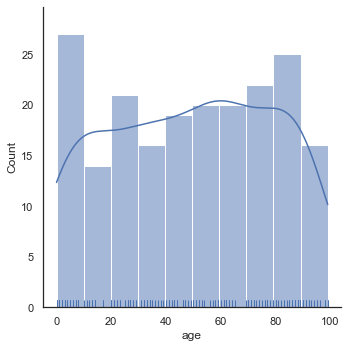

In [87]:
plt.figure(figsize=(12,8))
sns.displot(data=sample_ages, x='age', bins=10, rug=True, kde=True)

#### `rug`

- If `Ture` rugplot is shown. 
- Default: `False`

#### `kde`

- If `True` kdeplot is displayed. 
- Default: `False`